# Importing data and preliminary Inspection

In [176]:
#Getting the data
sur_data = read.csv('survival.csv' , header = T , stringsAsFactors = F)

In [177]:
#Inspecting the first few rows of the dataset
head(sur_data,5)

X,trt,celltype,time,status,karno,diagtime,age,prior
1,1,squamous,72,1,60,7,69,0
2,1,squamous,411,1,70,5,64,10
3,1,squamous,228,1,60,3,38,0
4,1,squamous,126,1,60,9,63,10
5,1,squamous,118,1,70,11,65,10


In [178]:
##Inspecting the last few rows of the dataset
tail(sur_data,5)

,X,trt,celltype,time,status,karno,diagtime,age,prior
133,133,2,large,133,1,75,1,65,0
134,134,2,large,111,1,60,5,64,0
135,135,2,large,231,1,70,18,67,10
136,136,2,large,378,1,80,4,65,0
137,137,2,large,49,1,30,3,37,0


# Data Cleaning

In [179]:
#Removing unwanted Columns 
sur_data=sur_data[2:ncol(sur_data)]

In [180]:
#Renaming the columns of the dataset
colnames(sur_data) = c('Treatment', 'Celltype', 'Time', 'Status' ,'Karno', 'DiagnosisTime' ,'Age', 'Prior')

In [181]:
#Inspecting the structure of the dataset
str(sur_data)

'data.frame':	137 obs. of  8 variables:
 $ Treatment    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Celltype     : chr  "squamous" "squamous" "squamous" "squamous" ...
 $ Time         : int  72 411 228 126 118 10 82 110 314 100 ...
 $ Status       : int  1 1 1 1 1 1 1 1 1 0 ...
 $ Karno        : int  60 70 60 60 70 20 40 80 50 70 ...
 $ DiagnosisTime: int  7 5 3 9 11 5 10 29 18 6 ...
 $ Age          : int  69 64 38 63 65 49 69 68 43 70 ...
 $ Prior        : int  0 10 0 10 10 0 10 0 0 0 ...


In [182]:
#Checking for missing Values
if (sum(complete.cases(sur_data))==nrow(sur_data)){
    print("There are no missing values in the dataset")
}else{
    print("There are missing values in the dataset")
}

[1] "There are no missing values in the dataset"


In [183]:
#Checking the summary of the dataset
summary(sur_data)

   Treatment       Celltype              Time           Status      
 Min.   :1.000   Length:137         Min.   :  1.0   Min.   :0.0000  
 1st Qu.:1.000   Class :character   1st Qu.: 25.0   1st Qu.:1.0000  
 Median :1.000   Mode  :character   Median : 80.0   Median :1.0000  
 Mean   :1.496                      Mean   :121.6   Mean   :0.9343  
 3rd Qu.:2.000                      3rd Qu.:144.0   3rd Qu.:1.0000  
 Max.   :2.000                      Max.   :999.0   Max.   :1.0000  
     Karno       DiagnosisTime         Age            Prior      
 Min.   :10.00   Min.   : 1.000   Min.   :34.00   Min.   : 0.00  
 1st Qu.:40.00   1st Qu.: 3.000   1st Qu.:51.00   1st Qu.: 0.00  
 Median :60.00   Median : 5.000   Median :62.00   Median : 0.00  
 Mean   :58.57   Mean   : 8.774   Mean   :58.31   Mean   : 2.92  
 3rd Qu.:75.00   3rd Qu.:11.000   3rd Qu.:66.00   3rd Qu.:10.00  
 Max.   :99.00   Max.   :87.000   Max.   :81.00   Max.   :10.00  

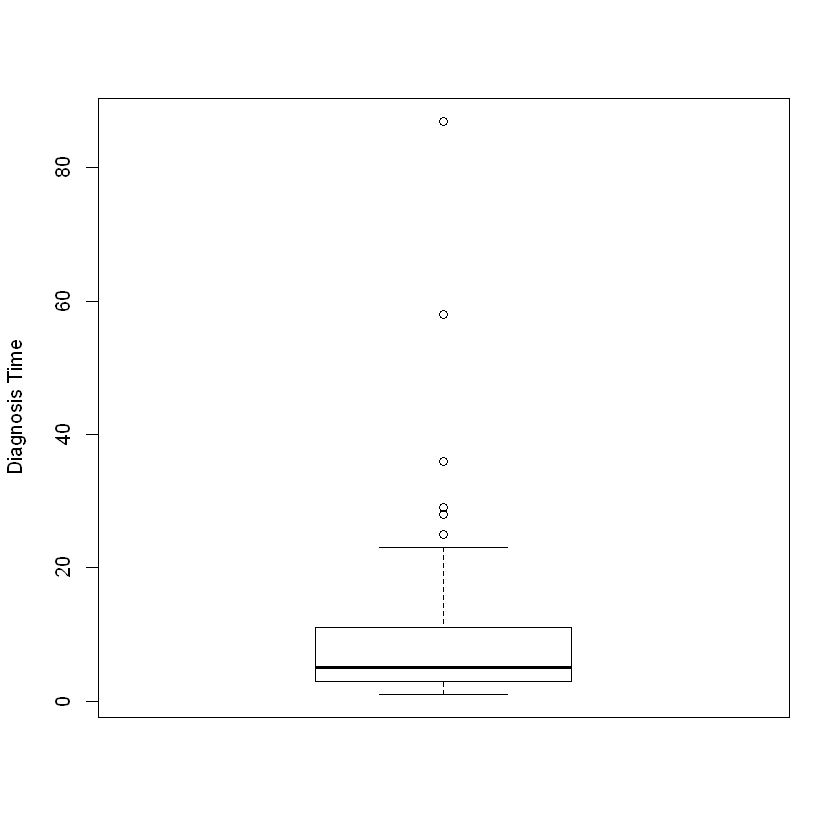

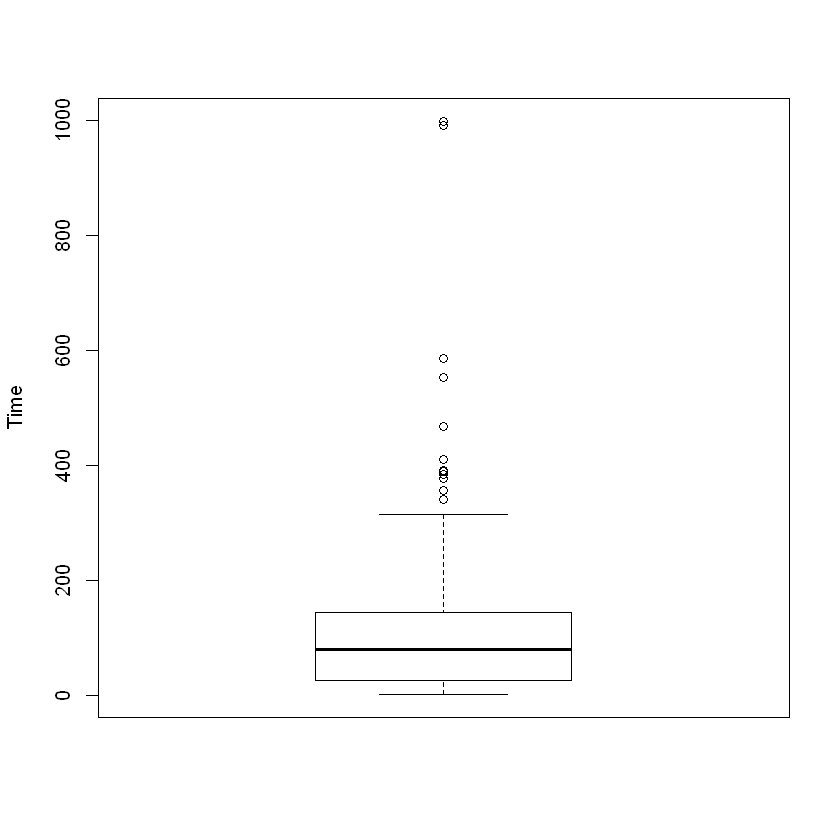

In [184]:
#On inspecting the summary it is apparent that Time column and the Diagonisis time have outliers 
#Lets confirm it using boxplots
boxplot(sur_data$DiagnosisTime , ylab = 'Diagnosis Time')
boxplot(sur_data$Time , ylab = 'Time')

In [185]:
#It is very clear that both fields have extreme outliers 
#we need to handle them as outliers largely corrupt the analysis

#Generally if there are a very low number of outliers we can eliminate the rows that have them
#But since survival datasets are very small we cannot afford to do so 
#Thus we use an appropriate median imputation method 

In [186]:
#We shall use the outliers package 
library(outliers)

In [193]:
#Handling outliers 
#This line has to be repeated until all outliers are removed 
sur_data$Time = rm.outlier(sur_data$Time , median = T , fill = T)

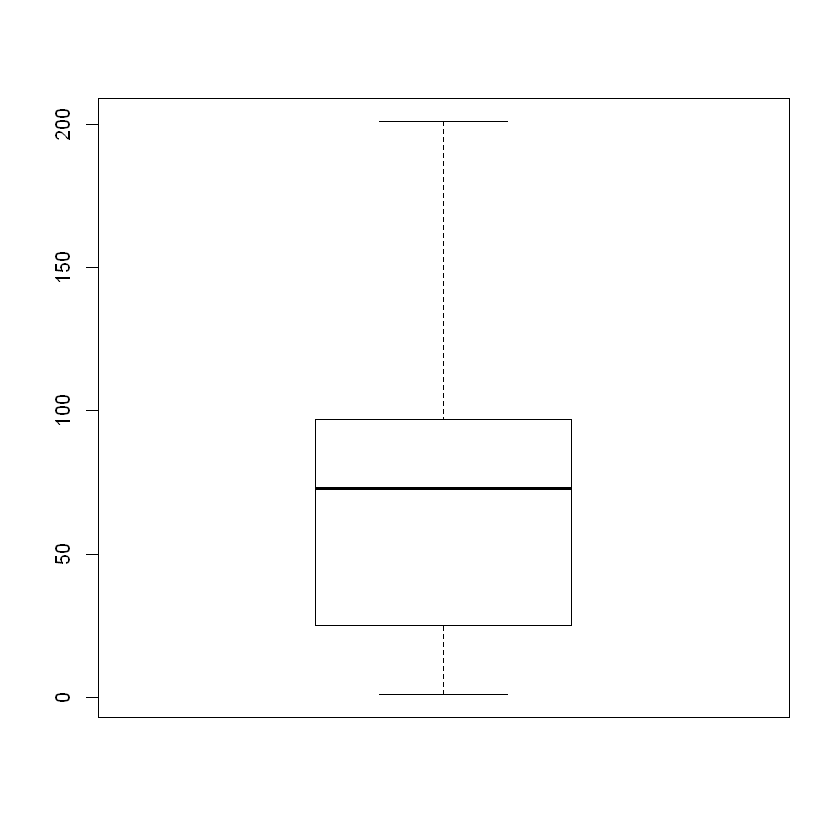

In [194]:
#Now we inspect the boxplot of the Time column and find that there are no outiers 
boxplot(sur_data$Time)

In [207]:
#Repeating the same process for the diagnosis time column 
sur_data$DiagnosisTime = rm.outlier(sur_data$DiagnosisTime , median = T , fill = T)

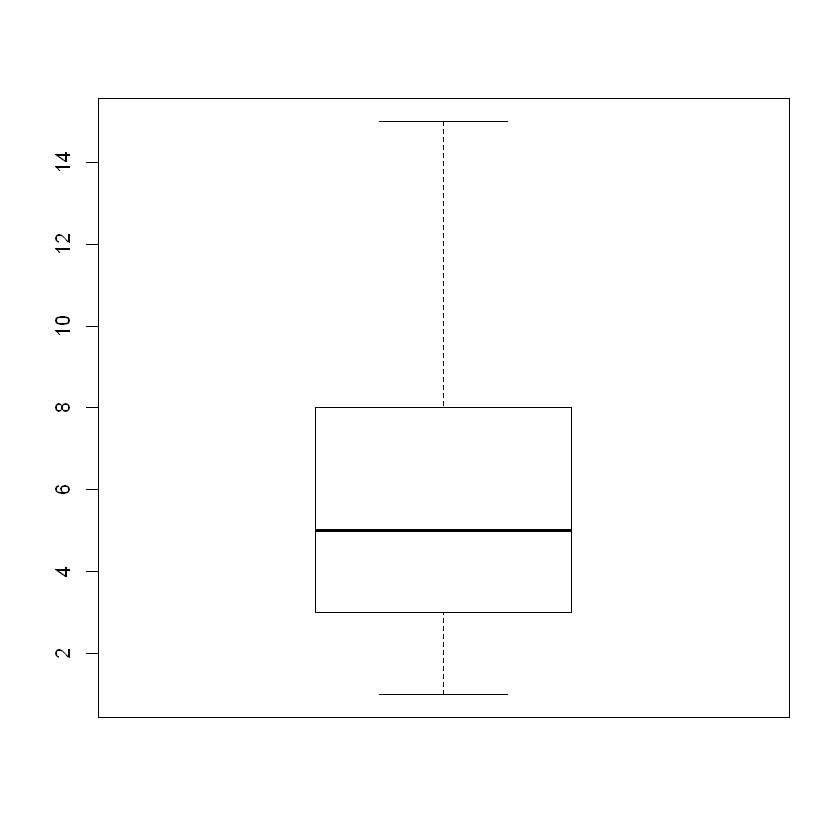

In [208]:
boxplot(sur_data$DiagnosisTime) # We now see that the outliers have been removed 

In [209]:
#Once again checking the summary of the data 
summary(sur_data)

   Treatment       Celltype              Time            Status      
 Min.   :1.000   Length:137         Min.   :  1.00   Min.   :0.0000  
 1st Qu.:1.000   Class :character   1st Qu.: 25.00   1st Qu.:1.0000  
 Median :1.000   Mode  :character   Median : 73.00   Median :1.0000  
 Mean   :1.496                      Mean   : 67.74   Mean   :0.9343  
 3rd Qu.:2.000                      3rd Qu.: 97.00   3rd Qu.:1.0000  
 Max.   :2.000                      Max.   :201.00   Max.   :1.0000  
     Karno       DiagnosisTime         Age            Prior      
 Min.   :10.00   Min.   : 1.000   Min.   :34.00   Min.   : 0.00  
 1st Qu.:40.00   1st Qu.: 3.000   1st Qu.:51.00   1st Qu.: 0.00  
 Median :60.00   Median : 5.000   Median :62.00   Median : 0.00  
 Mean   :58.57   Mean   : 5.723   Mean   :58.31   Mean   : 2.92  
 3rd Qu.:75.00   3rd Qu.: 8.000   3rd Qu.:66.00   3rd Qu.:10.00  
 Max.   :99.00   Max.   :15.000   Max.   :81.00   Max.   :10.00  

In [210]:
#We now see that there are no missing values or outliers 


In [217]:
#We now handle the values in the treatment column 
sur_data$Treatment = ifelse(sur_data$Treatment==1 , 'Treatment_1' , 'Treatment_2')

# Exploaratory Analysis &  Data Visualisation

In [221]:
#Applying the table function on all the categorical columns 
sapply(sur_data[,c(1,2)] , table)

$Treatment

Treatment_1 Treatment_2 
         69          68 

$Celltype

    adeno     large smallcell  squamous 
       27        27        48        35 


In [222]:
#Proportion of treatments
prop.table(table(sur_data$Treatment))


Treatment_1 Treatment_2 
  0.5036496   0.4963504 

In [223]:
#Proportion of celltypes
prop.table(table(sur_data$Celltype))


    adeno     large smallcell  squamous 
0.1970803 0.1970803 0.3503650 0.2554745 

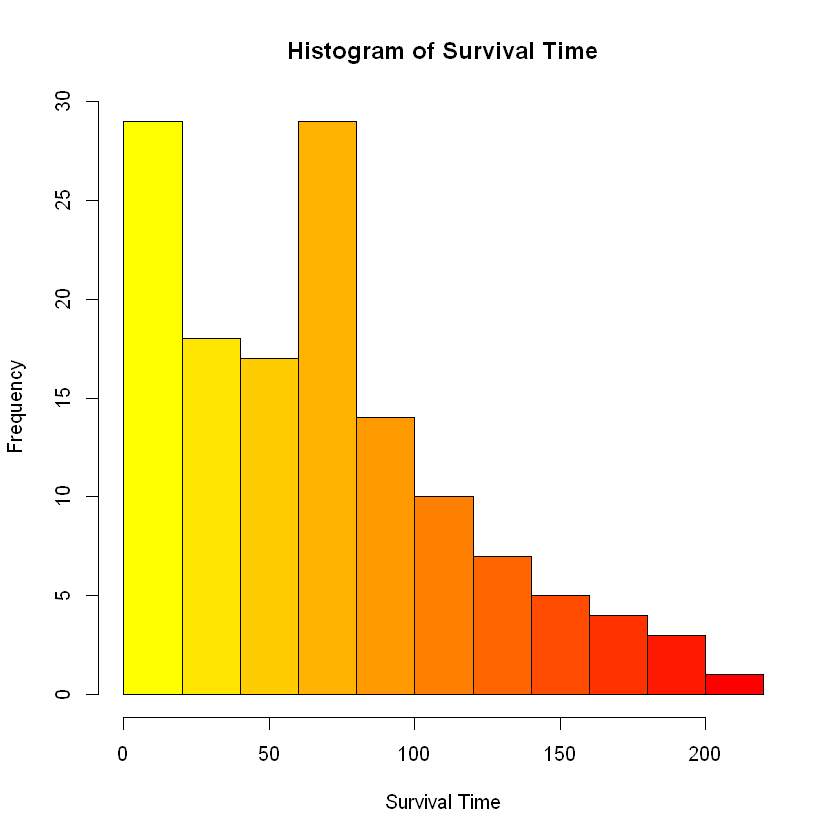

In [235]:
#Visualisation

crp = colorRampPalette(c('yellow' , 'red'))

#Survival time histogram
hist(sur_data$Time , breaks = 8 , c = crp(11) , xlab = 'Survival Time' , main = 'Histogram of Survival Time')

#We see that higher the survival time lesser is the frequency 

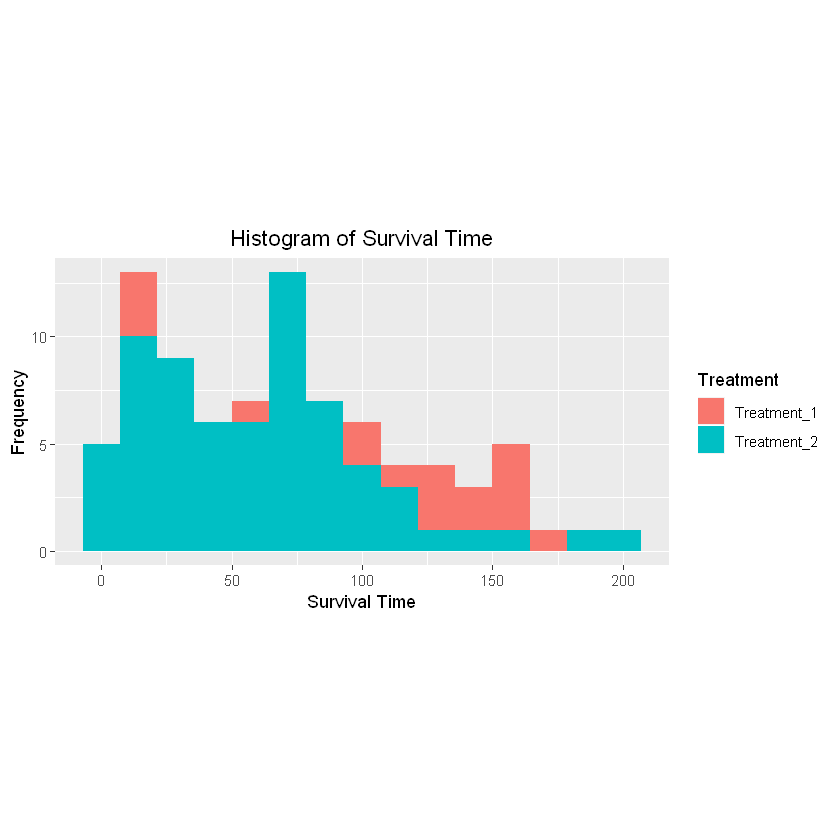

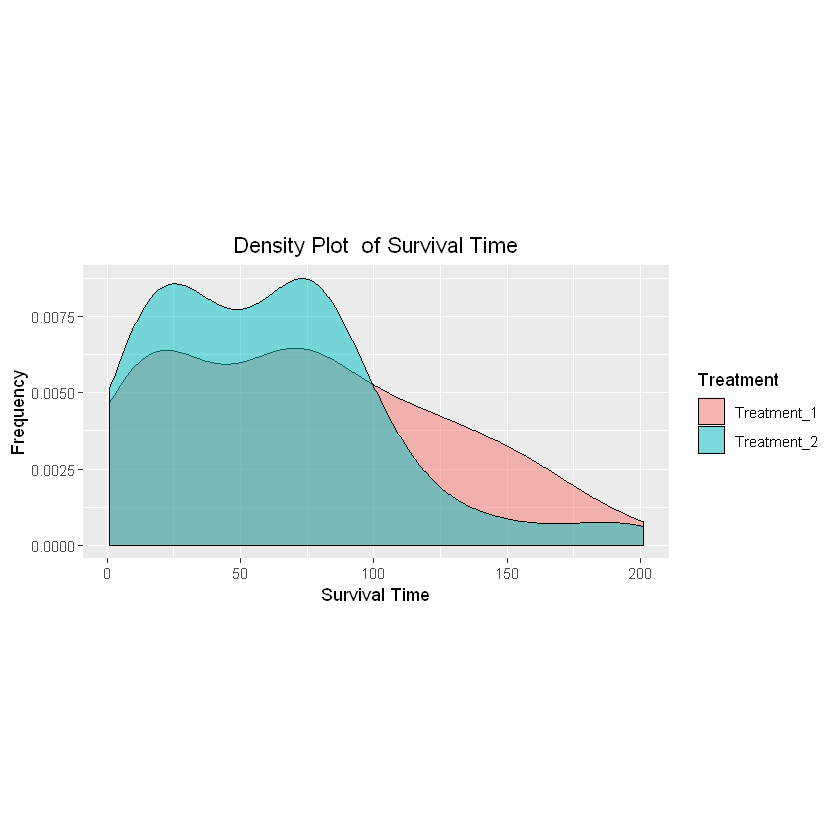

In [281]:

#Stacked histogram of the survival time according to the treatment 
ggplot(sur_data , aes(x = Time, fill = Treatment))+geom_histogram(position = "identity" , bins = 15)+
  labs(x = "Survival Time" , y = "Frequency" , title = "Histogram of Survival Time")+ 
  theme(plot.title = element_text(hjust = 0.5) , aspect.ratio = 0.5)

#Density plot of survival time according to treatment
ggplot(sur_data , aes(x = Time, fill = Treatment))+geom_density(position = "identity"  , alpha = 0.5)+
  labs(x = "Survival Time" , y = "Frequency" , title = "Density Plot  of Survival Time")+ 
  theme(plot.title = element_text(hjust = 0.5) , aspect.ratio = 0.5)







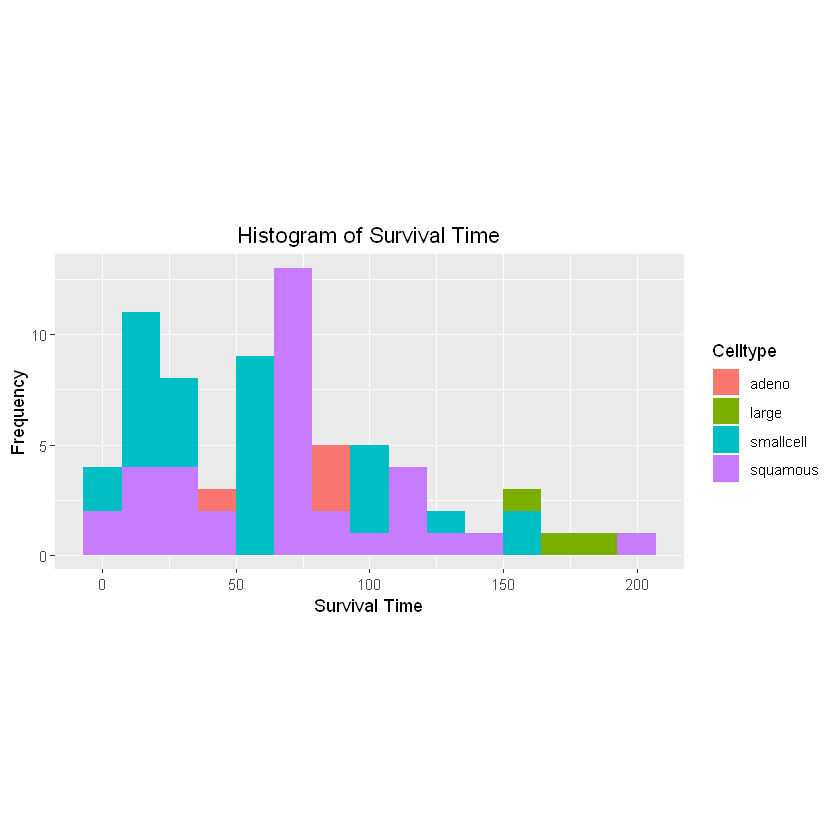

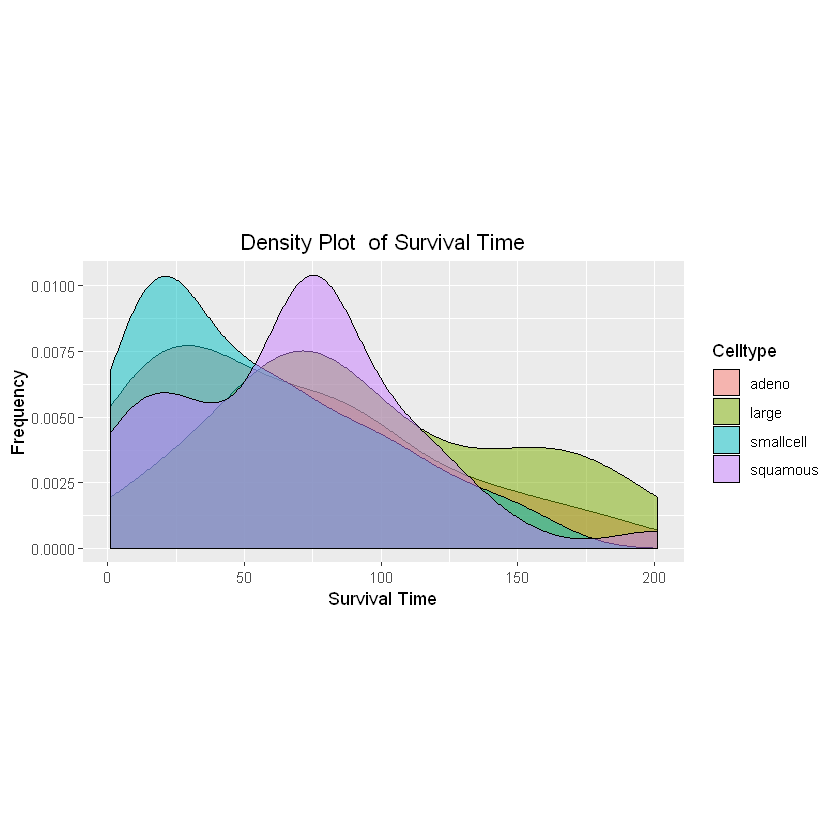

In [280]:
#Stacked histogram of the survival time according to the celltype
ggplot(sur_data , aes(x = Time, fill = Celltype))+geom_histogram(position = "identity" , bins = 15)+
  labs(x = "Survival Time" , y = "Frequency" , title = "Histogram of Survival Time")+ 
  theme(plot.title = element_text(hjust = 0.5) , aspect.ratio = 0.5)

#Density plot of survival time according to treatment
ggplot(sur_data , aes(x = Time, fill = Celltype))+geom_density(position = "identity" , alpha = 0.5 )+
  labs(x = "Survival Time" , y = "Frequency" , title = "Density Plot  of Survival Time")+ 
  theme(plot.title = element_text(hjust = 0.5) , aspect.ratio = 0.5)


#We find that the mean survival time of squamous is higher than small cell

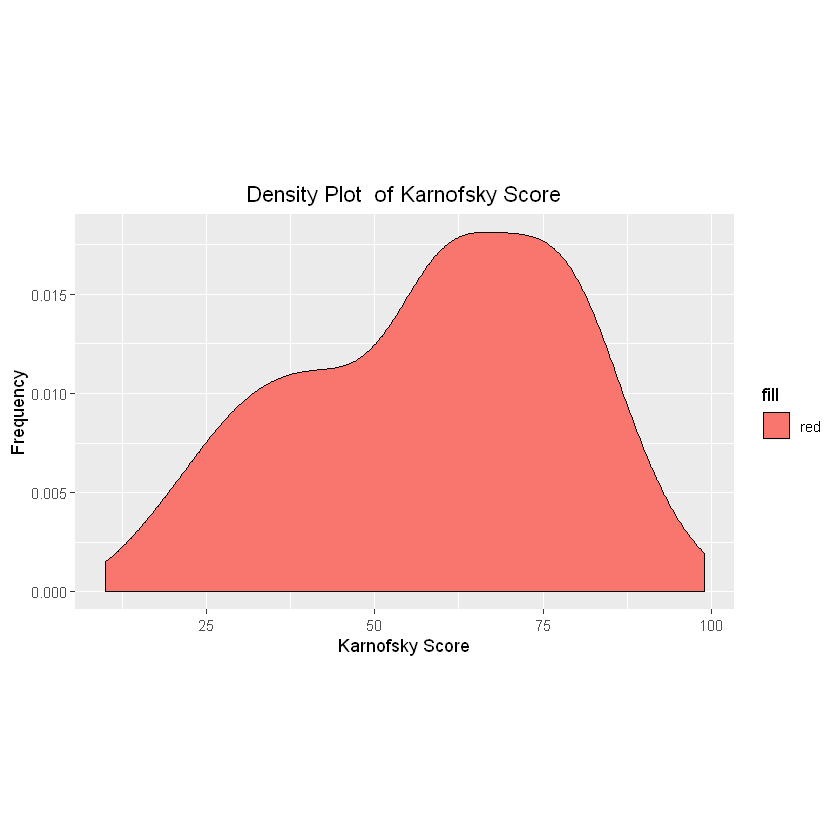

In [261]:
#Density plot of the karnofsky score 
#A higher score is better 
ggplot(sur_data , aes(x = Karno , fill = "red"))+geom_density()+
  labs(x = "Karnofsky Score" , y = "Frequency" , title = "Density Plot  of Karnofsky Score")+ 
  theme(plot.title = element_text(hjust = 0.5) , aspect.ratio = 0.6)

#We find that the mean is around 55 to 60 

In [255]:
mean(sur_data$Karno)

[1] 58.56934

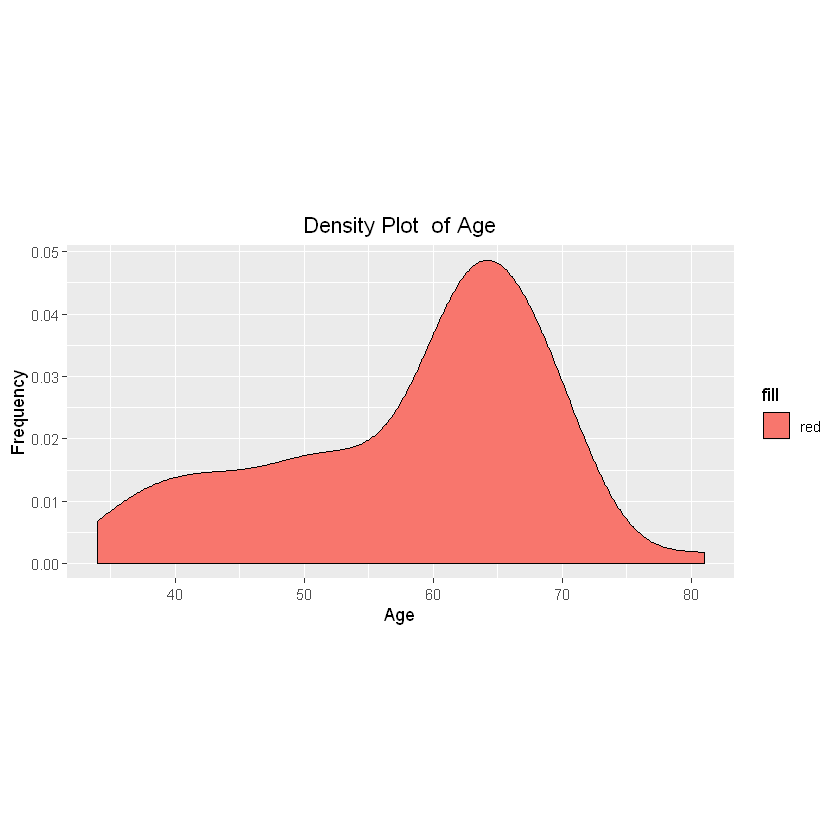

In [269]:
#Density plot  of age 
ggplot(sur_data , aes(x = Age , fill = "red"))+geom_density()+
  labs(x = "Age" , y = "Frequency" , title = "Density Plot  of Age")+ 
  theme(plot.title = element_text(hjust = 0.5) , aspect.ratio = 0.5)

#The mean age is between 60 and 70 


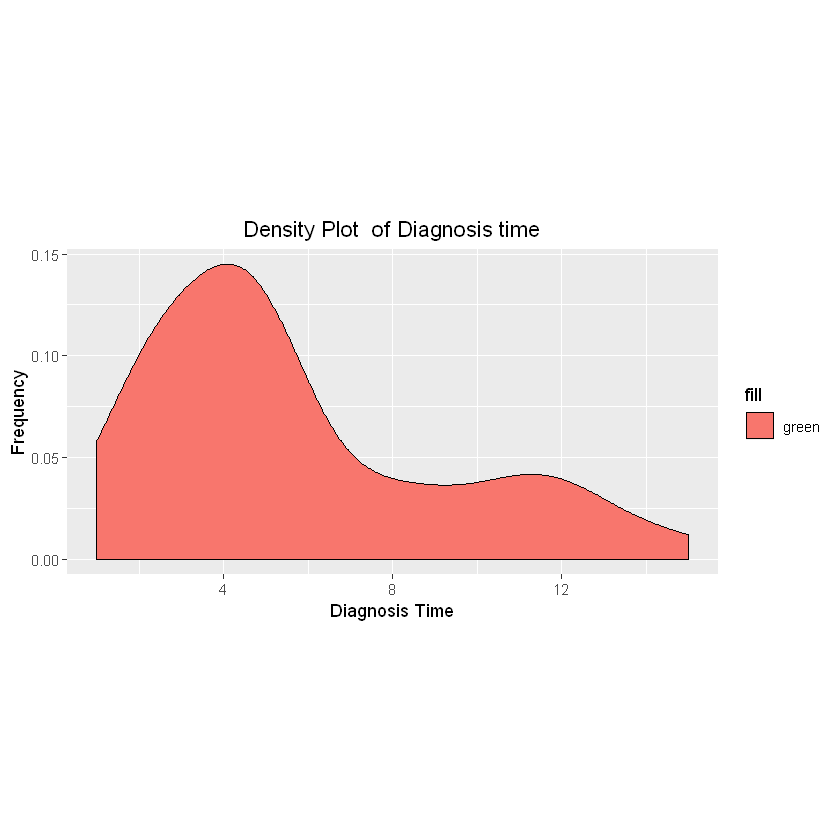

In [266]:
#Density plot of diagnosis time 
  ggplot(sur_data , aes(x = DiagnosisTime , fill = "green"))+geom_density()+
  labs(x = "Diagnosis Time" , y = "Frequency" , title = "Density Plot  of Diagnosis time")+ 
  theme(plot.title = element_text(hjust = 0.5) , aspect.ratio = 0.5)

#The median diagnosis time is around 5 months

adeno     large smallcell  squamous 
 4.481481  7.259259  5.020833  6.457143

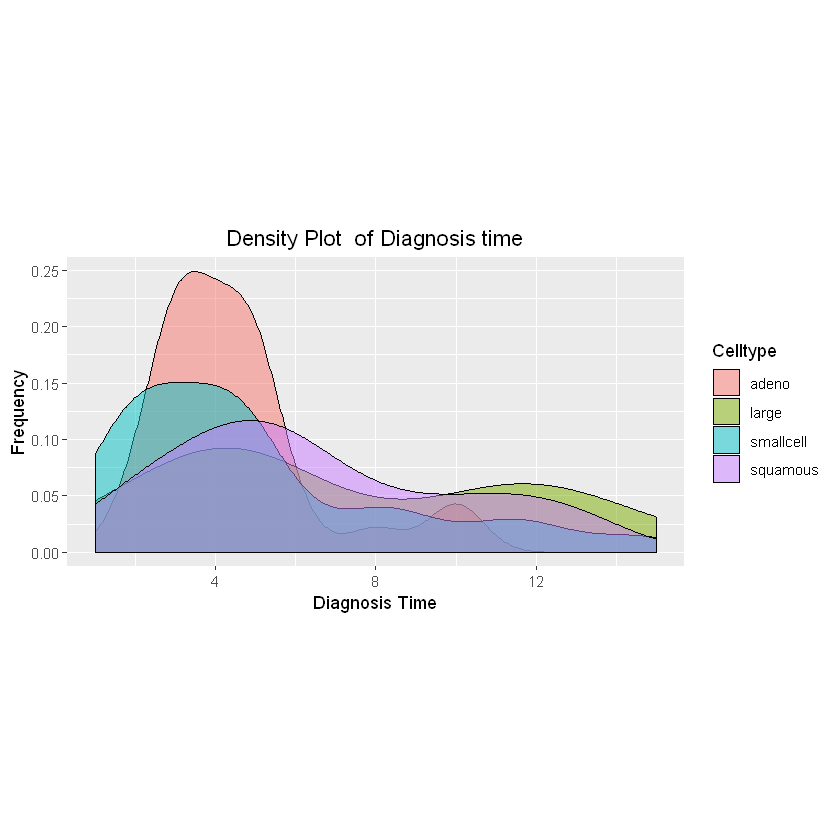

In [278]:
#Density plot of diagnosis time by cell type
  ggplot(sur_data , aes(x = DiagnosisTime , fill = Celltype))+geom_density(position = 'identity' , alpha = 0.5)+
  labs(x = "Diagnosis Time" , y = "Frequency" , title = "Density Plot  of Diagnosis time")+ 
  theme(plot.title = element_text(hjust = 0.5) , aspect.ratio = 0.5)

tapply(sur_data$DiagnosisTime , sur_data$Celltype ,mean)
#The mean diagnosis time of adeno is the lowest and squamous is the largest

# Survival Models

In [282]:
#Survival Model using Kaplan meier Estimate 

#Loading the package 
library(survival)

In [285]:
#Creating the survival object 
surv_object = survival::Surv(time = sur_data$Time , event = sur_data$Status , 
               type = "right")

In [296]:
#Fitting the survival object 
surv_fit = survfit(surv_object~1 , sur_data)

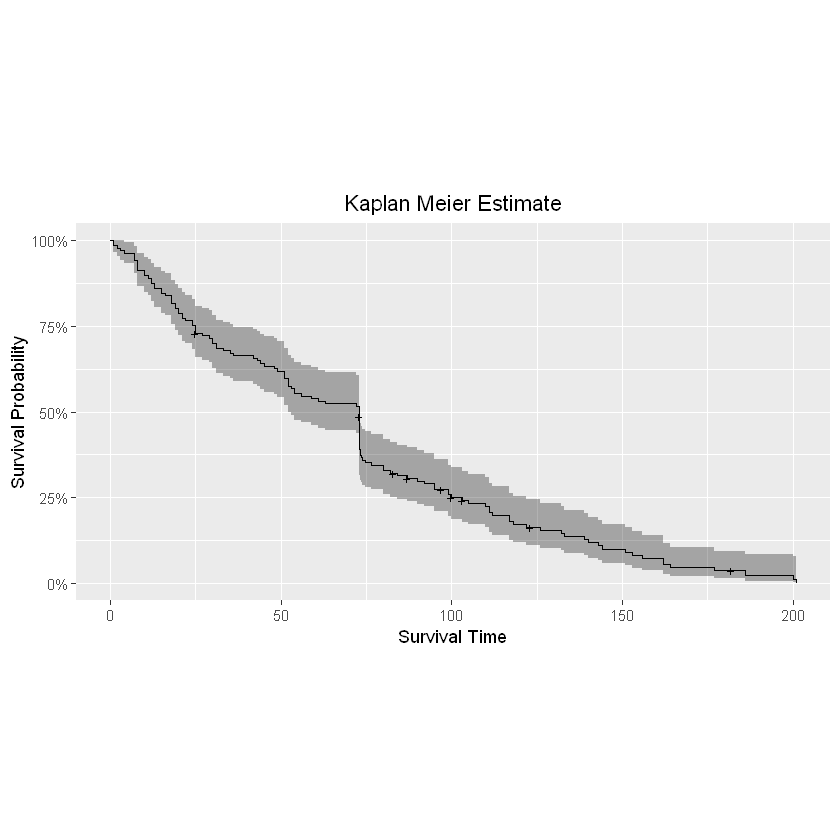

In [300]:
##### Plotting the Survival Object

library(ggfortify)
autoplot(surv_fit)+
  labs(x = "Survival Time" , y = "Survival Probability" , title = "Kaplan Meier Estimate")+ 
  theme(plot.title = element_text(hjust = 0.5) , aspect.ratio = 0.5)

#We see that there is a gradual decrease in survival probability with increase in time until about 75 days 
#At 75 days the survival probability sharply decreases after which again there is a gradual decrease in survival probability



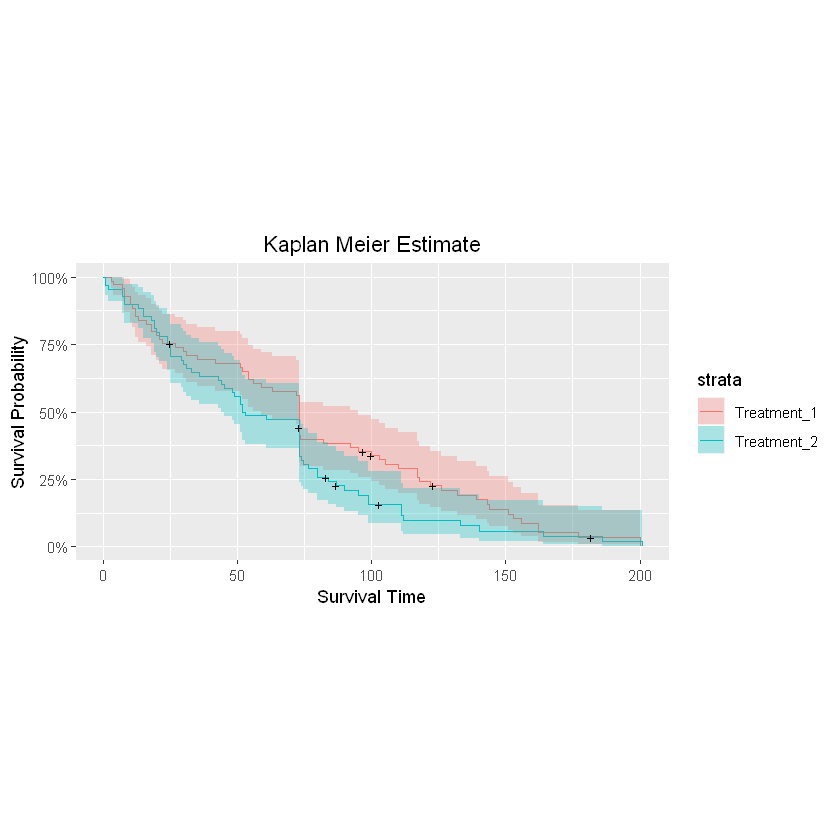

In [302]:
#Stratifying data according to the Treatment
surv_fit2 = survfit(surv_object~Treatment , sur_data)

library(ggfortify)
autoplot(surv_fit2)+
  labs(x = "Survival Time" , y = "Survival Probability" , title = "Kaplan Meier Estimate")+ 
  theme(plot.title = element_text(hjust = 0.5) , aspect.ratio = 0.5)


#It is seen that the survival probability for treatment 1 is generally higher than treatment 2 except for some points 
#at the beginning 

#For both the types there is a sharp decrease in survival probability at around  75 days 

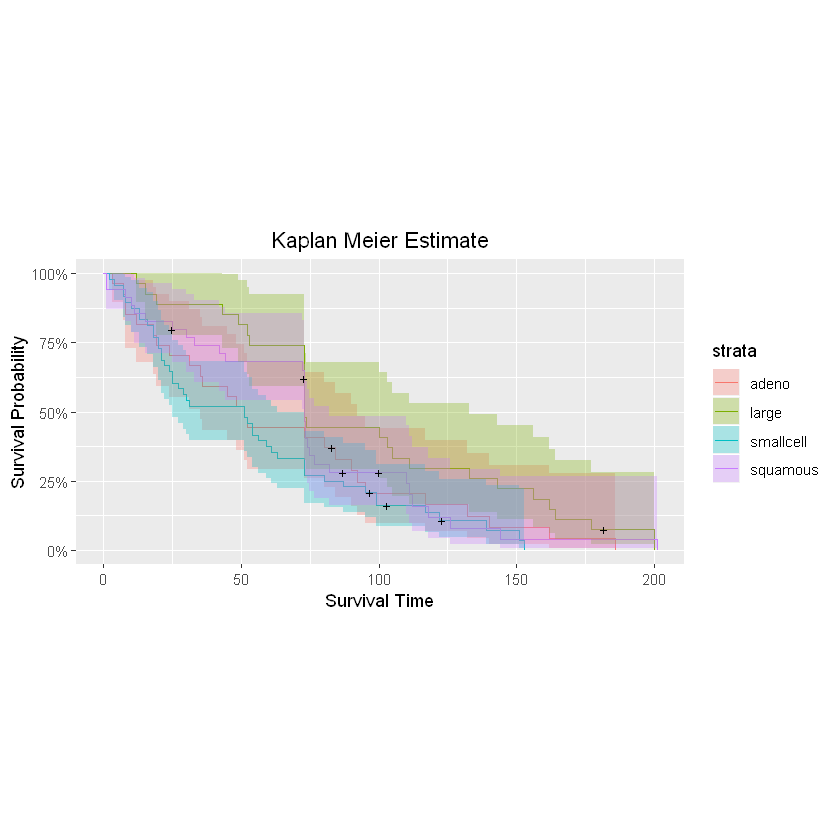

In [305]:
#Stratifying data according to the Cell Type 
surv_fit3 = survfit(surv_object~Celltype , sur_data)

library(ggfortify)
autoplot(surv_fit2)+
  labs(x = "Survival Time" , y = "Survival Probability" , title = "Kaplan Meier Estimate")+ 
  theme(plot.title = element_text(hjust = 0.5) , aspect.ratio = 0.5)


#We can see that overall for 

In [329]:
#Coxproportional hazards model 

#Here we examine the effect of various covariates on the survival probability 

cox_mod = coxph(formula = surv_object~Treatment+Karno+Age+Celltype+Prior,data = sur_data)

In [331]:
#Getting the summary
summary(cox_mod)
#We see that the treatment type , Age and karnofsky score are significant 

Call:
coxph(formula = surv_object ~ Treatment + Karno + Age + Celltype + 
    Prior, data = sur_data)

  n= 137, number of events= 128 

                          coef exp(coef)  se(coef)      z Pr(>|z|)    
TreatmentTreatment_2  0.438123  1.549795  0.193984  2.259   0.0239 *  
Karno                -0.036240  0.964409  0.005175 -7.003  2.5e-12 ***
Age                  -0.019134  0.981048  0.009255 -2.067   0.0387 *  
Celltypelarge        -0.348293  0.705892  0.295356 -1.179   0.2383    
Celltypesmallcell     0.100462  1.105681  0.260579  0.386   0.6998    
Celltypesquamous     -0.230230  0.794351  0.278045 -0.828   0.4077    
Prior                -0.011956  0.988116  0.021412 -0.558   0.5766    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

                     exp(coef) exp(-coef) lower .95 upper .95
TreatmentTreatment_2    1.5498     0.6452    1.0596    2.2667
Karno                   0.9644     1.0369    0.9547    0.9742
Age                     0.9810     1.0193

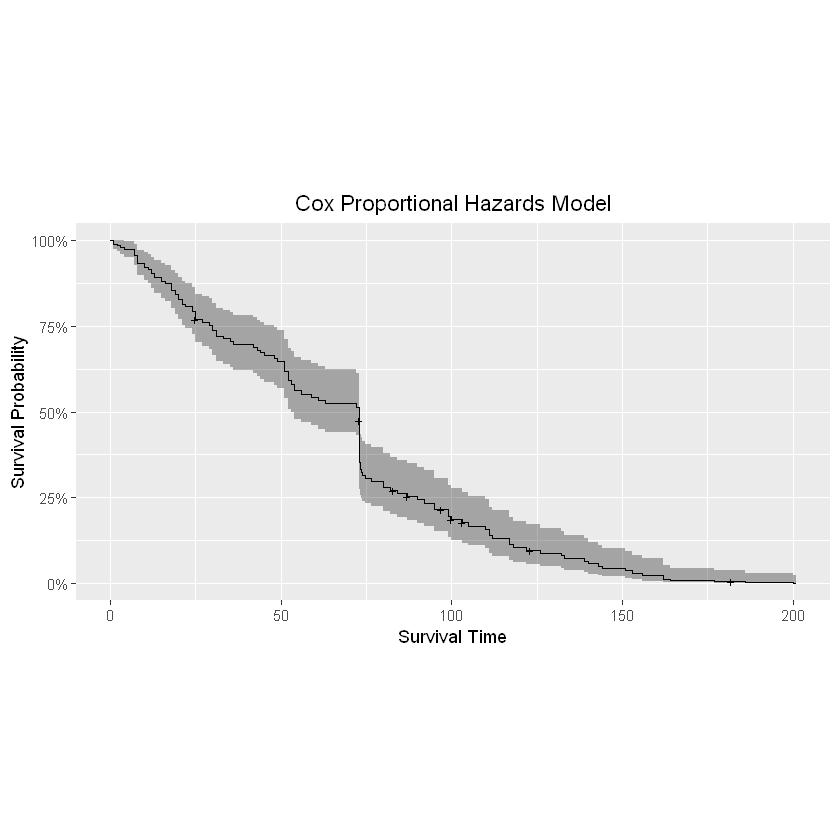

In [362]:
#Visualisation of the cox model 
cox_fitted = survfit(cox_mod)

autoplot(cox_fitted)+
  labs(x = "Survival Time" , y = "Survival Probability" , title = "Cox Proportional Hazards Model")+ 
  theme(plot.title = element_text(hjust = 0.5) , aspect.ratio = 0.5)

#As with the previous model it is seen that there is a sharp decrease in survival probability at 75 days

In [338]:
#Survival trees 

library(ranger)

In [339]:
#Fitting the model

sur_tree = ranger(surv_object ~ Treatment+Karno+Age+Celltype+Prior,data = sur_data , 
                 importance = 'permutation' , splitrule = 'extratrees' , seed = 33)

In [346]:
#Averaging all the trees 
dtimes = sur_tree$unique.death.times
dprob = as.data.frame(sur_tree$survival)
mean_prob = sapply(dprob , mean)

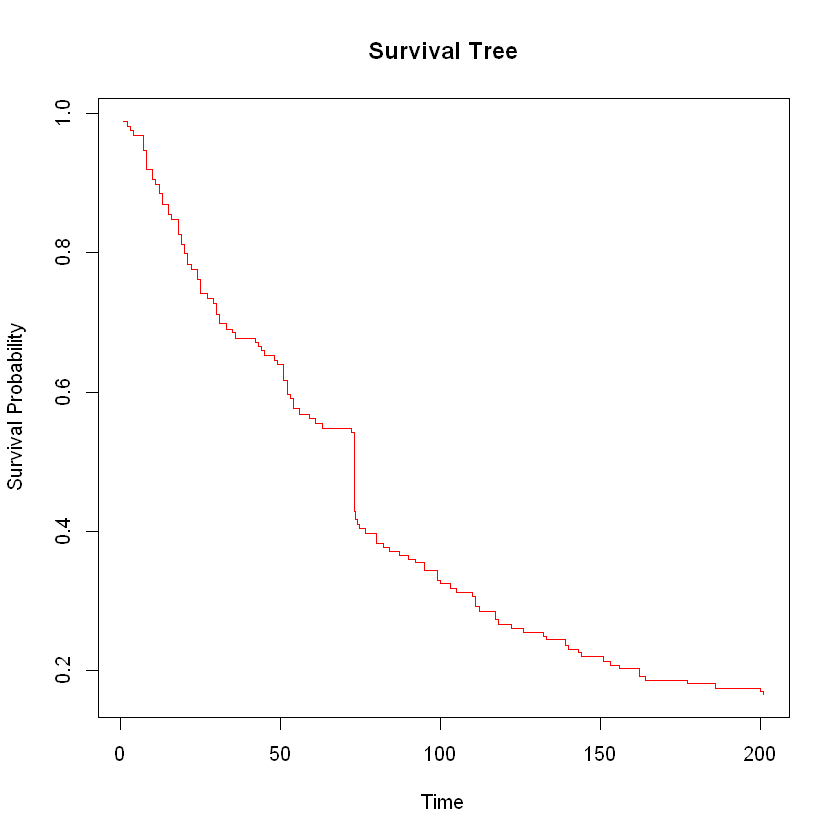

In [363]:
#Plotting the results 
plot(dtimes , mean_prob , type = "s" , col = 'red' , xlab = 'Time' , ylab = 'Survival Probability' , main = "Survival Tree" )

#as with the previous models in this model as well there is a sharp decrease n survival probability at 75 days 

In [375]:
#Creating individual dataframes for the models

km_mod = data.frame(Time = surv_fit$time , Probability = surv_fit$surv)

km_mod$Model = 'Kaplan Meier'

coxp_mod = data.frame(Time = cox_fitted$time , Probability = cox_fitted$surv)

coxp_mod$Model = 'Cox Proportional'

tree_mod = data.frame(Time = dtimes , Probability = mean_prob)

tree_mod$Model = 'Survival Tree'

In [376]:
#Checking the lengths of the dataframes 
nrow(km_mod)
nrow(coxp_mod)
nrow(tree_mod)

[1] 98

[1] 98

[1] 98

In [377]:
#Combing the dataframes 
all_mods = rbind(km_mod , coxp_mod , tree_mod)

In [378]:
#Viewing the head
head(all_mods , 10)

#Using table function 
table(all_mods$Model)

Time,Probability,Model
1,0.9854015,Kaplan Meier
2,0.9781022,Kaplan Meier
3,0.9708029,Kaplan Meier
4,0.9635036,Kaplan Meier
7,0.9416058,Kaplan Meier
8,0.9124088,Kaplan Meier
10,0.8978102,Kaplan Meier
11,0.8905109,Kaplan Meier
12,0.8759124,Kaplan Meier
13,0.8613139,Kaplan Meier



Cox Proportional     Kaplan Meier    Survival Tree 
              98               98               98 

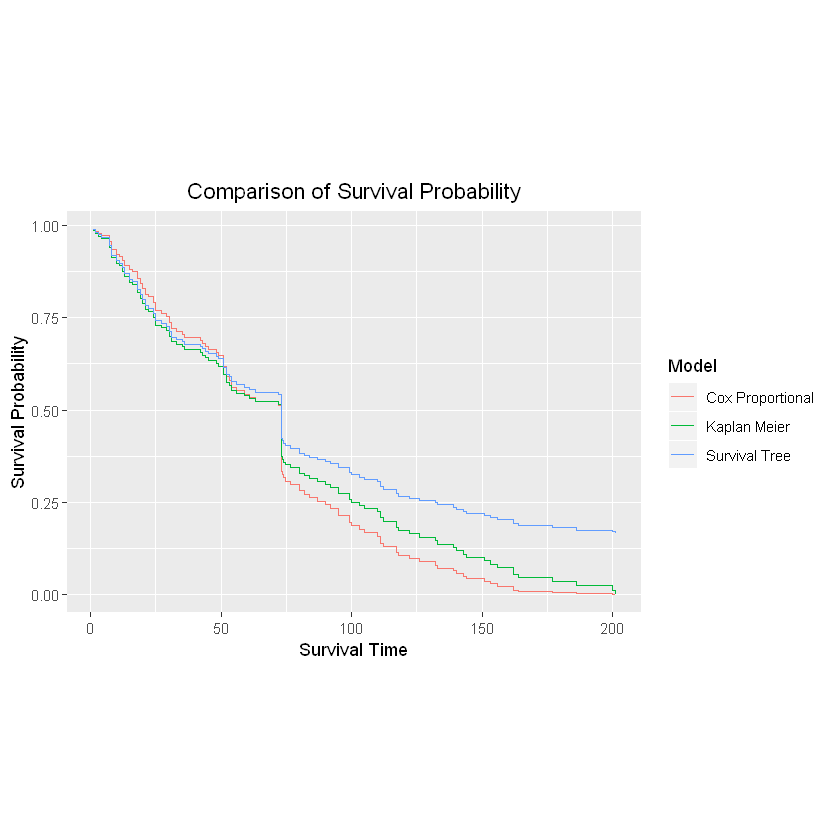

In [385]:
#Comparison plot of the models

ggplot(data = all_mods , aes(x = Time , y = Probability , col = Model))+geom_step()+ labs(x = "Survival Time" , y = "Survival Probability" , title = "Comparison of Survival Probability")+ 
  theme(plot.title = element_text(hjust = 0.5) , aspect.ratio = 0.7)

In [386]:
#Inferences from the comparison plot 

#1. The Survival Probability for all the three models are fairly similar upto about 60 days 
#2. The survival probability gradually decreases until this point 
#3. At about 75 days there is a sharp decrease in survival probability in all three models 
#4. After the point of sharpest descent once again there is a gradual decrease in survival probability 
#5. The Cox model has the lowest survival probability and the survival tree has the highest survival probability 
# beyond the point of steepest descent 